# Estado de Mexico

In [1]:
from IPython.display import display

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data/able_to_work.csv')
del df["Unnamed: 0"]

for element in ['fecha_reporte', 'fecha_evento', 'fecha_de_ultimo_avistamiento','fecha_de_ingreso',  'fecha_de_localizacion','fecha_probable_de_fallecimiento']:
    df[element] = pd.to_datetime(df[element],errors="coerce") # el errors coerce, tomará todos los errores en fechas como NaT, con lo que vemos inconcistencias

C:\Users\Diego\AppData\Local\Temp\ipykernel_17812\1460404765.py:1: DtypeWarning: Columns (5,7,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/able_to_work.csv')


In [3]:
edo_Mex = df[df["estado"] == "mexico"].copy()
edo_Mex.T.head()

,1439,2111,2241,3406,3477,3656,4184,4890,4936,4945,...,99056,99057,99058,99059,99060,99061,99062,99063,99064,99065
registro_nacional,desaparecido,desaparecido,desaparecido,desaparecido,desaparecido,desaparecido,desaparecido,desaparecido,desaparecido,desaparecido,...,desaparecido,desaparecido,desaparecido,desaparecido,desaparecido,desaparecido,desaparecido,desaparecido,desaparecido,desaparecido
fecha_reporte,2011-06-06 08:30:00,2011-11-08 09:20:00,2011-10-03 11:41:00,2011-06-08 12:00:00,2009-03-10 12:00:00,2011-12-06 08:00:00,2012-02-24 10:21:00,2013-06-24 01:25:00,2009-11-08 12:00:00,2009-07-10 12:00:00,...,2018-03-18 07:54:36,2018-03-19 08:16:59,2018-03-21 09:57:44,2018-03-22 11:30:38,2018-03-22 07:16:19,2018-03-23 11:40:15,2018-03-26 03:51:00,2018-03-26 03:41:57,2018-03-27 03:26:28,2018-03-27 06:58:18
fecha_evento,2011-05-14 12:00:00,2011-09-08 09:00:00,2011-09-03 10:10:00,2011-05-08 12:00:00,2009-09-30 12:00:00,2008-08-30 01:00:00,2012-01-28 12:00:00,2013-07-06 05:30:00,2009-08-08 12:00:00,2009-05-10 12:00:00,...,2018-03-13 07:40:00,2018-03-17 06:00:00,2018-03-20 07:00:00,2018-03-20 12:50:00,2018-09-03 11:00:00,2018-03-16 07:15:00,2018-03-25 10:00:00,2018-03-24 05:30:00,2018-03-17 06:30:00,2018-09-03 04:30:00
estado,mexico,mexico,mexico,mexico,mexico,mexico,mexico,mexico,mexico,mexico,...,mexico,mexico,mexico,mexico,mexico,mexico,mexico,mexico,mexico,mexico
clave_estado,15,15,15,15,15,15,15,15,15,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
edo_Mex['year_reporte'] = edo_Mex['fecha_reporte'].dt.year
edo_Mex["dias_de_busqueda_reporte"] = edo_Mex["fecha_de_localizacion"] - edo_Mex["fecha_reporte"]
edo_Mex["dias_de_busqueda_evento"] = edo_Mex["fecha_de_localizacion"] - edo_Mex["fecha_evento"]
edo_Mex.rename(columns = {"estado_(localizado)" : "estado_localizado"}, inplace = True)
edo_Mex.rename(columns = {"municipio_(localizado)" : "municipio_localizado"}, inplace = True)
edo_Mex[["year_reporte", "dias_de_busqueda_reporte","dias_de_busqueda_evento","estado_localizado"]].head()

,year_reporte,dias_de_busqueda_reporte,dias_de_busqueda_evento,estado_localizado
1439,2011,1354 days 03:30:00,1377 days 00:00:00,hidalgo
2111,2011,1694 days 02:40:00,1755 days 03:00:00,hidalgo
2241,2011,NaT,NaT,no_especificado
3406,2011,-31 days +00:00:00,0 days 00:00:00,no_especificado
3477,2009,NaT,NaT,no_especificado


In [5]:
edo_Mex.sexo.value_counts()

femenino     6439
masculino    5658
Name: sexo, dtype: int64

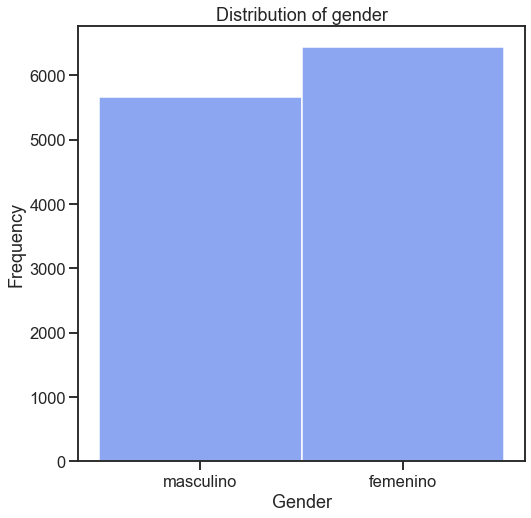

In [6]:
plt.figure(figsize=(8, 8))

sns.set_palette("coolwarm")
sns.set_style("ticks")
sns.set_context("talk")

plt.ylabel('Frequency')
plt.xlabel('Gender')
plt.title('Distribution of gender')

sns.histplot(edo_Mex.sexo)
plt.show()

In [7]:
edo_Mex.vivo_o_muerto.value_counts()

vivo                 7749
aun_sin_localizar    3891
muerto                457
Name: vivo_o_muerto, dtype: int64

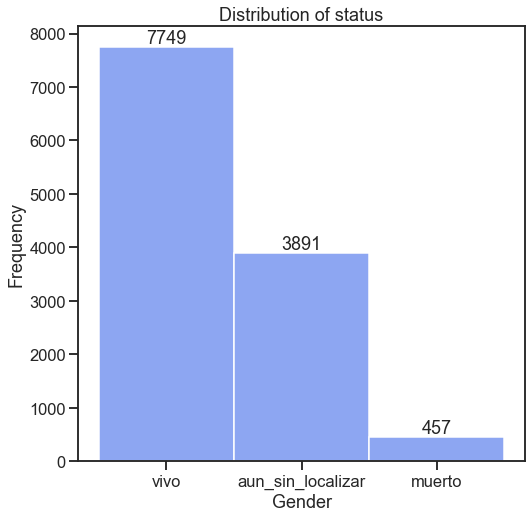

In [8]:
plt.figure(figsize=(8, 8))

sns.set_palette("coolwarm")
sns.set_style("ticks")
sns.set_context("talk")

plt.ylabel('Frequency')
plt.xlabel('Gender')
plt.title('Distribution of status')

ax = sns.histplot(edo_Mex.vivo_o_muerto)
ax.bar_label(ax.containers[0])

plt.show()

In [9]:
edo_Mex[(edo_Mex["sexo"]=="femenino")].vivo_o_muerto.value_counts()

vivo                 4560
aun_sin_localizar    1786
muerto                 93
Name: vivo_o_muerto, dtype: int64

In [10]:
edo_Mex[(edo_Mex["sexo"]=="masculino")].vivo_o_muerto.value_counts()

vivo                 3189
aun_sin_localizar    2105
muerto                364
Name: vivo_o_muerto, dtype: int64

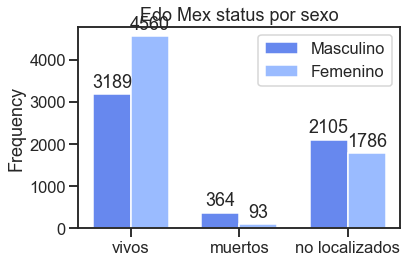

In [11]:
labels = ['vivos', 'muertos', 'no localizados']
men_means = [ 3189,364,2105]
women_means = [4560, 93, 1786]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Masculino')
rects2 = ax.bar(x + width/2, women_means, width, label='Femenino')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency')
ax.set_title('Edo Mex status por sexo')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [12]:
edo_Mex[(edo_Mex["sexo"]=="masculino")].posible_causa_desaparicion.value_counts().head(20) # el total estaba arriba de 200 posibles causas, muestro solo las 20 con mas frecuencias

-1                                      1595
no_especificado                          901
problemas_familiares                     236
problemas_personales                      67
problemas_sociales                        52
problemas_de_salud                        40
por_su_propia_voluntad                    32
alcoholismo                               24
extravio_real                             22
salud                                     22
adicciones                                20
detenido                                  19
problemas_de_adiccion                     18
problemas_de_conducta                     18
ausencia_voluntaria_por_noviazgo          17
falta_de_comunicacion_con_la_familia      16
arresto_o_proceso_legal                   15
ausencia_voluntaria_por_fiesta            15
problemas_de_alcoholismo                  15
motivos_laborales                         15
Name: posible_causa_desaparicion, dtype: int64

In [13]:
edo_Mex[(edo_Mex["sexo"]=="masculino") & (edo_Mex["vivo_o_muerto"] == "muerto")].posible_causa_desaparicion.value_counts()

no_especificado                                                                                                                                                                                                                                                                                               138
-1                                                                                                                                                                                                                                                                                                            136
semefo                                                                                                                                                                                                                                                                                                         11
problemas_de_salud                                                                

In [14]:
edo_Mex[(edo_Mex["sexo"]=="femenino")].posible_causa_desaparicion.value_counts().head(20) #eran 242 en total

-1                                      2038
no_especificado                         1062
problemas_familiares                     497
ausencia_voluntaria_por_noviazgo         153
problemas_personales                     105
problemas_sociales                        80
relaciones_personales                     71
por_su_propia_voluntad                    68
ausencia_por_noviazgo                     33
problemas_de_salud                        18
ausencia_voluntaria_por_noviaz            17
problemas_economicos                      16
problemas_de_conducta                     15
falta_de_comunicacion_con_la_familia      15
falta_de_comunicacion_con_fami            15
violencia_familiar                        13
salud                                     13
falta_de_comunicacion_con_familia         12
novio                                     12
auscencia_volutaria_por_noviazgo          12
Name: posible_causa_desaparicion, dtype: int64

In [15]:
edo_Mex[(edo_Mex["sexo"]=="femenino") & (edo_Mex["vivo_o_muerto"] == "muerto")].posible_causa_desaparicion.value_counts()

no_especificado                                                                                 37
-1                                                                                              37
problemas_familiares                                                                             6
victima_de_delito                                                                                3
victima_de_homicidio                                                                             2
viajaba_a_visitar_a_su_familia_en_tetela_de_ocampo_y_aparentemente_fue_agredida_en_el_camino     1
se_reviza_album_de_cadaver_desconocidos_y_es_identificada                                        1
ausencia_involuntaria_por_accidente                                                              1
problemas_personales                                                                             1
problemas_de_salud                                                                               1
drogadicci

In [16]:
edo_Mex.ocupacion.value_counts()

no_especificado             8377
sin_dato                    1067
empleado_particular          673
estudiante                   598
hogar                        352
desempleado                  284
comerciante                  167
albañil                       39
campesino                     32
funcionario_pub.              26
chofer                        25
ama_de_casa                   21
taxista                       17
trabajador_independiente      14
obrero                         9
pensionado_(a)                 5
ex-afi                         3
ex-policia                     3
carpintero                     2
taquero                        2
hojalatero                     2
machetero                      2
servidor_publico               2
abogado                        2
profesor_(a)                   2
mesero                         2
herrero                        2
artesano                       2
piloto_aviador_comercial       1
cobrador                       1
sacerdote 

## Municipios information

In [17]:
edo_Mex[(edo_Mex["vivo_o_muerto"] == "muerto")].municipio.value_counts().head(10)

ecatepec_de_morelos    35
toluca                 32
nezahualcoyotl         31
no_especificado        27
tlalnepantla_de_baz    24
naucalpan_de_juarez    22
tecamac                16
chimalhuacan           15
texcoco                15
nicolas_romero         12
Name: municipio, dtype: int64

In [18]:
edo_Mex[(edo_Mex["vivo_o_muerto"] == "muerto")].municipio_localizado.value_counts().head(10)

no_especificado        91
toluca                 33
texcoco                28
ecatepec_de_morelos    24
nezahualcoyotl         23
cuautitlan             21
naucalpan_de_juarez    11
tlalnepantla_de_baz    11
cuautitlan_izcalli     10
chalco                 10
Name: municipio_localizado, dtype: int64

In [19]:
edo_Mex[(edo_Mex["vivo_o_muerto"] == "vivo")].municipio.value_counts().head(10)

toluca                         885
nezahualcoyotl                 743
ecatepec_de_morelos            663
no_especificado                649
tlalnepantla_de_baz            358
naucalpan_de_juarez            322
chimalhuacan                   299
atizapan_de_zaragoza           247
ixtapaluca                     231
valle_de_chalco_solidaridad    205
Name: municipio, dtype: int64

In [20]:
edo_Mex[(edo_Mex["vivo_o_muerto"] == "vivo")].municipio_localizado.value_counts().head(10)

no_especificado        1822
toluca                  824
nezahualcoyotl          544
ecatepec_de_morelos     459
tlalnepantla_de_baz     251
naucalpan_de_juarez     251
chimalhuacan            212
chalco                  195
ixtapaluca              180
texcoco                 171
Name: municipio_localizado, dtype: int64

In [21]:
edo_Mex[(edo_Mex["vivo_o_muerto"] == "muerto") & (edo_Mex["sexo"]=="femenino")].municipio.value_counts().head(10)

toluca                         8
tecamac                        6
no_especificado                6
chimalhuacan                   5
tlalnepantla_de_baz            5
nicolas_romero                 5
ecatepec_de_morelos            5
nezahualcoyotl                 5
naucalpan_de_juarez            3
valle_de_chalco_solidaridad    3
Name: municipio, dtype: int64

In [22]:
edo_Mex[(edo_Mex["vivo_o_muerto"] == "muerto") & (edo_Mex["sexo"]=="femenino")].municipio_localizado.value_counts().head(10)

no_especificado        21
toluca                  6
chimalhuacan            5
cuautitlan              4
tlalnepantla_de_baz     4
ecatepec_de_morelos     3
texcoco                 3
nicolas_romero          3
cuautitlan_izcalli      3
nezahualcoyotl          2
Name: municipio_localizado, dtype: int64

In [23]:
edo_Mex[(edo_Mex["vivo_o_muerto"] == "muerto") & (edo_Mex["sexo"]=="masculino")].municipio.value_counts().head(10)

ecatepec_de_morelos    30
nezahualcoyotl         26
toluca                 24
no_especificado        21
tlalnepantla_de_baz    19
naucalpan_de_juarez    19
texcoco                14
chalco                 10
chimalhuacan           10
tecamac                10
Name: municipio, dtype: int64

In [24]:
edo_Mex[(edo_Mex["vivo_o_muerto"] == "muerto") & (edo_Mex["sexo"]=="masculino")].municipio_localizado.value_counts().head(10)

no_especificado        70
toluca                 27
texcoco                25
nezahualcoyotl         21
ecatepec_de_morelos    21
cuautitlan             17
naucalpan_de_juarez    10
chalco                  8
tlalnepantla_de_baz     7
la_paz                  7
Name: municipio_localizado, dtype: int64

## Grupos delictivos

In [25]:
edo_Mex[(edo_Mex["sexo"]=="femenino")].relacion_con_grupos_delictivos.value_counts()

no    6439
Name: relacion_con_grupos_delictivos, dtype: int64

In [26]:
edo_Mex[(edo_Mex["sexo"]=="masculino")].relacion_con_grupos_delictivos.value_counts()

no    5658
Name: relacion_con_grupos_delictivos, dtype: int64

## Edades 

In [27]:
edo_Mex.edad.value_counts()

16.0     1006
15.0      969
14.0      728
17.0      720
13.0      433
         ... 
94.0        3
99.0        2
96.0        2
91.0        1
102.0       1
Name: edad, Length: 98, dtype: int64

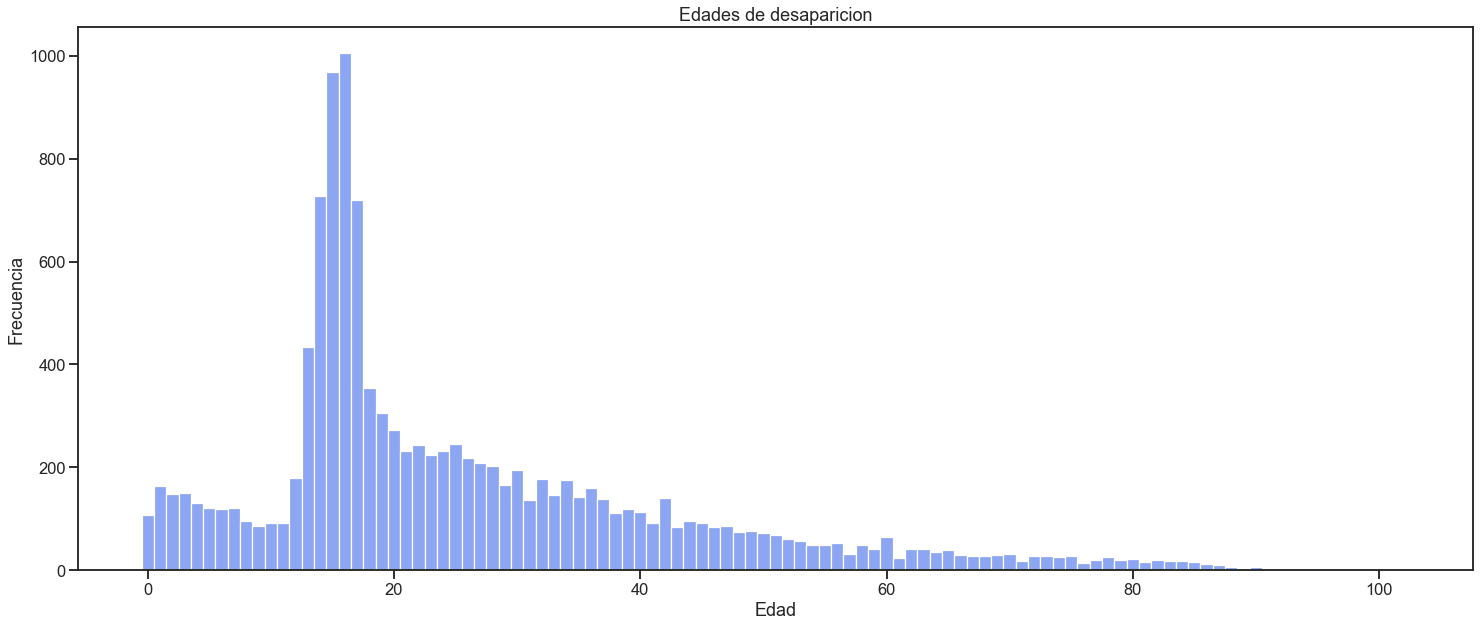

In [28]:
plt.figure(figsize=(25,10))

sns.set_palette("coolwarm")
sns.set_style("ticks")
sns.set_context("talk")


sns.histplot(edo_Mex.edad,discrete='True')

plt.title('Edades de desaparicion')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

plt.show()

In [29]:
edo_Mex.edad.value_counts().head()

16.0    1006
15.0     969
14.0     728
17.0     720
13.0     433
Name: edad, dtype: int64

## Individuos 16 años

In [30]:
edo_Mex[(edo_Mex["edad"]==16)].sexo.value_counts()

femenino     787
masculino    219
Name: sexo, dtype: int64

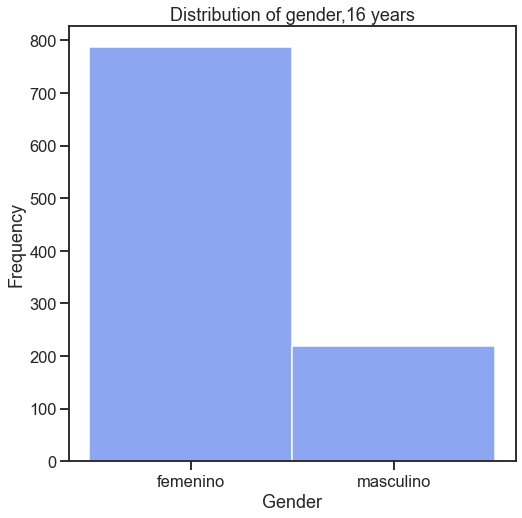

In [31]:
plt.figure(figsize=(8, 8))

sns.set_palette("coolwarm")
sns.set_style("ticks")
sns.set_context("talk")

plt.ylabel('Frequency')
plt.xlabel('Gender')
plt.title('Distribution of gender,16 years')

sns.histplot(edo_Mex[(edo_Mex["edad"]==16)].sexo)
plt.show()

In [32]:
edo_Mex[(edo_Mex["edad"]==16) & (edo_Mex["sexo"]=="femenino")].ocupacion.value_counts()

no_especificado             603
estudiante                   72
sin_dato                     59
hogar                        20
empleado_particular           7
desempleado                   6
comerciante                   2
empresario                    1
franelero                     1
trabajador_independiente      1
Name: ocupacion, dtype: int64

In [33]:
edo_Mex[(edo_Mex["edad"]==16) & (edo_Mex["sexo"]=="masculino")].ocupacion.value_counts()

no_especificado             155
sin_dato                     18
estudiante                   18
empleado_particular           7
hogar                         4
desempleado                   3
albañil                       2
trabajador_independiente      1
chofer                        1
comerciante                   1
campesino                     1
Name: ocupacion, dtype: int64

In [34]:
edo_Mex[(edo_Mex["edad"]==16) & (edo_Mex["sexo"]=="femenino")].posible_causa_desaparicion.value_counts().head()

-1                                  242
no_especificado                     138
problemas_familiares                 44
problemas_personales                 26
ausencia_voluntaria_por_noviazgo     25
Name: posible_causa_desaparicion, dtype: int64

In [46]:
edo_Mex[(edo_Mex["edad"]==16) & (edo_Mex["sexo"]=="masculino")].posible_causa_desaparicion.value_counts().head()

-1                        47
no_especificado           29
problemas_familiares       8
problemas_personales       6
por_su_propia_voluntad     6
Name: posible_causa_desaparicion, dtype: int64

In [36]:
edo_Mex[(edo_Mex["edad"]==16) & (edo_Mex["sexo"]=="femenino")].vivo_o_muerto.value_counts()

vivo                 586
aun_sin_localizar    197
muerto                 4
Name: vivo_o_muerto, dtype: int64

In [37]:
edo_Mex[(edo_Mex["edad"]==16) & (edo_Mex["sexo"]=="masculino")].vivo_o_muerto.value_counts()

vivo                 136
aun_sin_localizar     80
muerto                 3
Name: vivo_o_muerto, dtype: int64

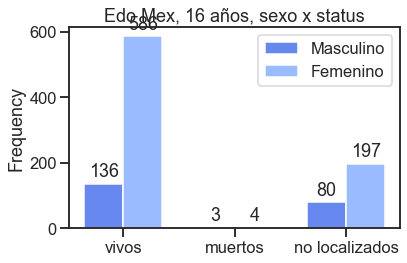

In [52]:
labels = ['vivos', 'muertos', 'no localizados']
men_means = [ 136,3,80]
women_means = [586, 4, 197]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Masculino')
rects2 = ax.bar(x + width/2, women_means, width, label='Femenino')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency')
ax.set_title('Edo Mex, 16 años, sexo x status')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [39]:
edo_Mex[(edo_Mex["edad"]==16) & (edo_Mex["sexo"]=="masculino") & (edo_Mex["vivo_o_muerto"]=="vivo")].estado_localizado.value_counts()

estado_de_mexico    119
no_especificado       2
distrito_federal      1
guerrero              1
tamaulipas            1
morelos               1
Name: estado_localizado, dtype: int64

In [40]:
edo_Mex[(edo_Mex["edad"]==16) & (edo_Mex["sexo"]=="masculino") & (edo_Mex["vivo_o_muerto"]=="muerto")].estado_localizado.value_counts()

estado_de_mexico    3
Name: estado_localizado, dtype: int64

In [41]:
edo_Mex[(edo_Mex["edad"]==16) & (edo_Mex["sexo"]=="femenino") & (edo_Mex["vivo_o_muerto"]=="vivo")].estado_localizado.value_counts()

estado_de_mexico    515
distrito_federal     11
no_especificado       9
veracruz              4
puebla                4
hidalgo               2
guerrero              2
sinaloa               1
jalisco               1
nuevo_leon            1
tlaxcala              1
michoacan             1
san_luis_potosi       1
baja_california       1
morelos               1
chihuahua             1
oaxaca                1
chiapas               1
Name: estado_localizado, dtype: int64

In [42]:
edo_Mex[(edo_Mex["edad"]==16) & (edo_Mex["sexo"]=="femenino") & (edo_Mex["vivo_o_muerto"]=="muerto")].estado_localizado.value_counts()

estado_de_mexico    4
Name: estado_localizado, dtype: int64

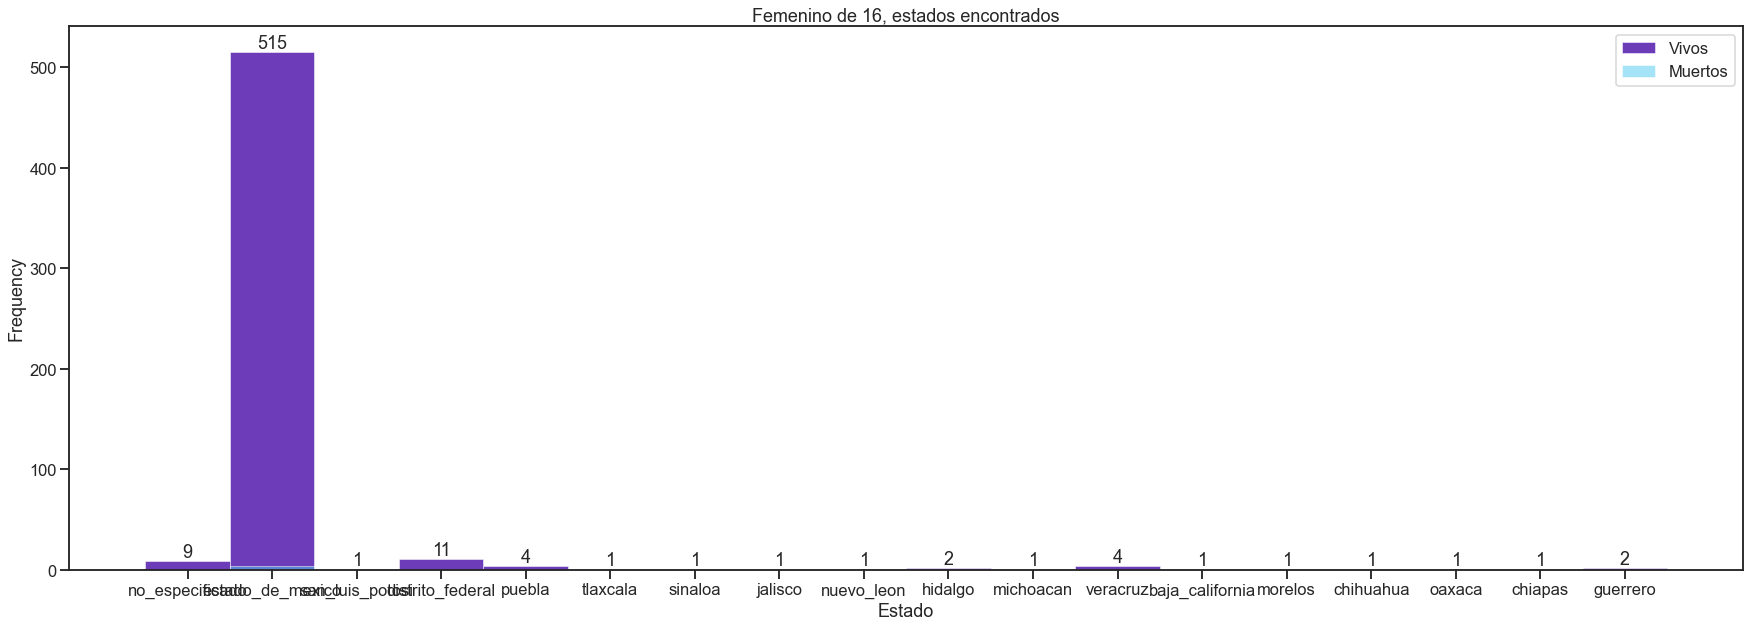

In [43]:
plt.figure(figsize=(30,10))

sns.set_style("ticks")
sns.set_context("talk")

sns.histplot(edo_Mex[(edo_Mex["edad"] == 16 ) & (edo_Mex["sexo"]== "femenino") & (edo_Mex["vivo_o_muerto"] == "vivo")].estado_localizado, label='Vivos', color="#480ca8", alpha=0.8,linewidth=.5)
ax = sns.histplot(edo_Mex[(edo_Mex["edad"] == 16 ) & (edo_Mex["sexo"]== "femenino") & (edo_Mex["vivo_o_muerto"] == "muerto")].estado_localizado, label='Muertos', color="#4cc9f0",alpha=0.5,linewidth=.5)#4361ee
ax.bar_label(ax.containers[0])

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Estado')
plt.title('Femenino de 16, estados encontrados')

plt.show()

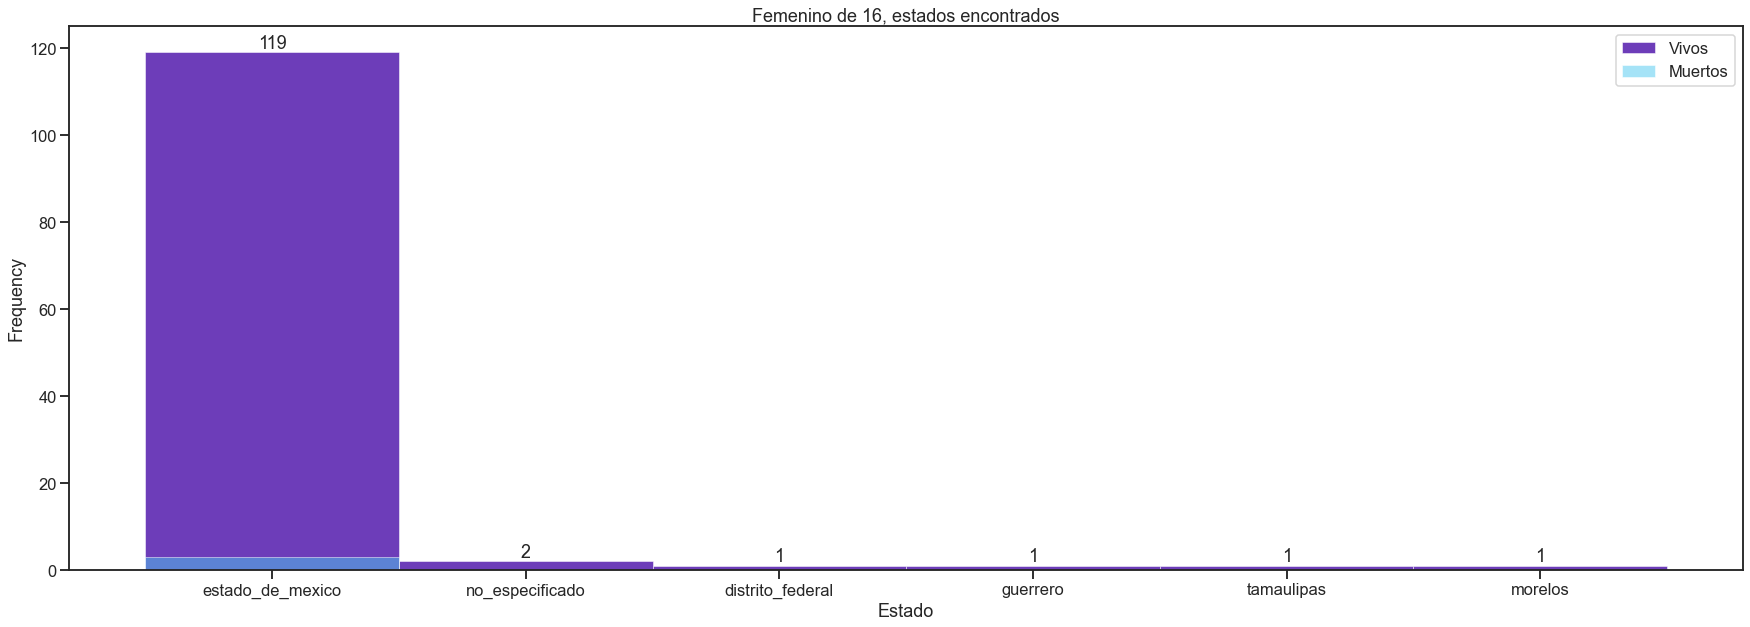

In [44]:
plt.figure(figsize=(30,10))

sns.set_style("ticks")
sns.set_context("talk")

sns.histplot(edo_Mex[(edo_Mex["edad"] == 16 ) & (edo_Mex["sexo"]== "masculino") & (edo_Mex["vivo_o_muerto"] == "vivo")].estado_localizado, label='Vivos', color="#480ca8", alpha=0.8,linewidth=.5)
ax = sns.histplot(edo_Mex[(edo_Mex["edad"] == 16 ) & (edo_Mex["sexo"]== "masculino") & (edo_Mex["vivo_o_muerto"] == "muerto")].estado_localizado, label='Muertos', color="#4cc9f0",alpha=0.5,linewidth=.5)
ax.bar_label(ax.containers[0])

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Estado')
plt.title('Femenino de 16, estados encontrados')

plt.show()

## Individuos de 15 años 

In [45]:
edo_Mex[(edo_Mex["edad"]==15)].sexo.value_counts()

femenino     779
masculino    190
Name: sexo, dtype: int64

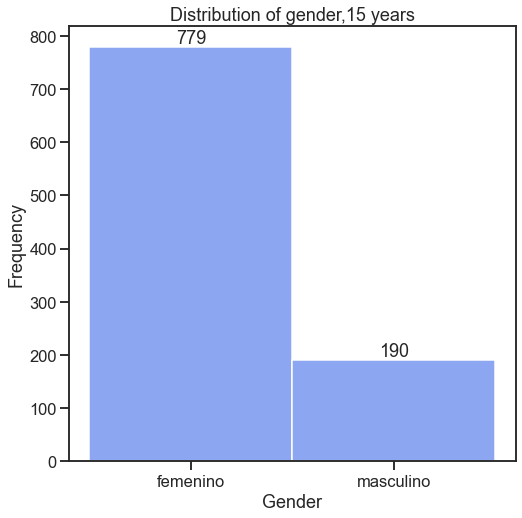

In [48]:
plt.figure(figsize=(8, 8))

sns.set_palette("coolwarm")
sns.set_style("ticks")
sns.set_context("talk")

plt.ylabel('Frequency')
plt.xlabel('Gender')
plt.title('Distribution of gender,15 years')

ax = sns.histplot(edo_Mex[(edo_Mex["edad"]==15)].sexo)
ax.bar_label(ax.containers[0])

plt.show()

In [49]:
edo_Mex[(edo_Mex["edad"]==15) & (edo_Mex["sexo"]=="femenino")].vivo_o_muerto.value_counts()

vivo                 610
aun_sin_localizar    166
muerto                 3
Name: vivo_o_muerto, dtype: int64

In [50]:
edo_Mex[(edo_Mex["edad"]==15) & (edo_Mex["sexo"]=="masculino")].vivo_o_muerto.value_counts()

vivo                 133
aun_sin_localizar     54
muerto                 3
Name: vivo_o_muerto, dtype: int64

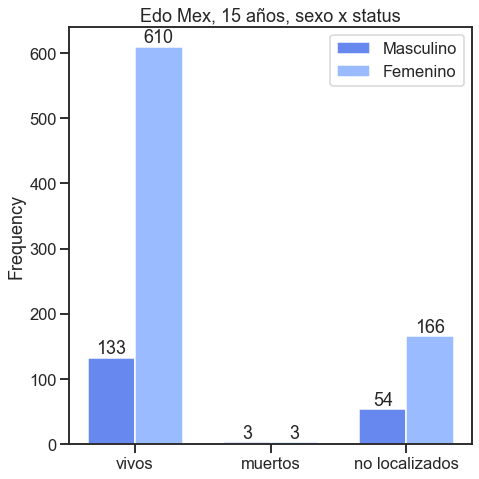

In [73]:
labels = ['vivos', 'muertos', 'no localizados']
men_means = [133,3,54]
women_means = [610, 3, 166]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(7,7))
rects1 = ax.bar(x - width/2, men_means, width, label='Masculino')
rects2 = ax.bar(x + width/2, women_means, width, label='Femenino')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency')
ax.set_title('Edo Mex, 15 años, sexo x status')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0), #(offset x, offset y)
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [74]:
edo_Mex[(edo_Mex["edad"]==15) & (edo_Mex["sexo"]=="masculino") & (edo_Mex["vivo_o_muerto"]=="vivo")].estado_localizado.value_counts()

estado_de_mexico    118
distrito_federal      2
guerrero              2
no_especificado       1
guanajuato            1
baja_california       1
michoacan             1
tlaxcala              1
oaxaca                1
hidalgo               1
Name: estado_localizado, dtype: int64

In [75]:
edo_Mex[(edo_Mex["edad"]==15) & (edo_Mex["sexo"]=="masculino") & (edo_Mex["vivo_o_muerto"]=="muerto")].estado_localizado.value_counts()

estado_de_mexico    2
Name: estado_localizado, dtype: int64

In [76]:
edo_Mex[(edo_Mex["edad"]==15) & (edo_Mex["sexo"]=="femenino") & (edo_Mex["vivo_o_muerto"]=="vivo")].estado_localizado.value_counts()

estado_de_mexico    547
distrito_federal     14
no_especificado      10
queretaro             3
puebla                3
guerrero              2
guanajuato            2
quintana_roo          2
oaxaca                2
tlaxcala              1
morelos               1
veracruz              1
sinaloa               1
hidalgo               1
tamaulipas            1
Name: estado_localizado, dtype: int64

In [77]:
edo_Mex[(edo_Mex["edad"]==15) & (edo_Mex["sexo"]=="masculino") & (edo_Mex["vivo_o_muerto"]=="muerto")].estado_localizado.value_counts()

estado_de_mexico    2
Name: estado_localizado, dtype: int64

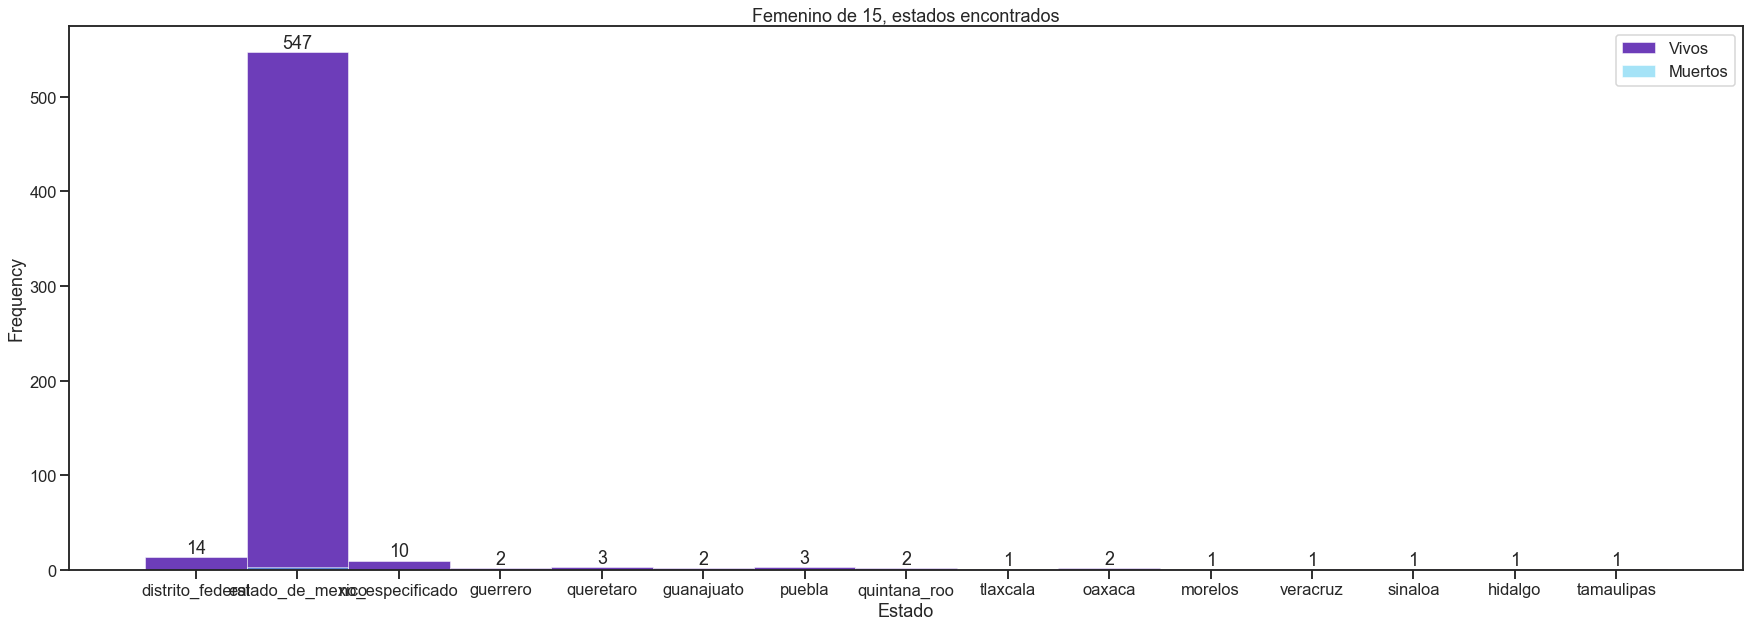

In [79]:
plt.figure(figsize=(30,10))

sns.set_style("ticks")
sns.set_context("talk")

sns.histplot(edo_Mex[(edo_Mex["edad"] == 15 ) & (edo_Mex["sexo"]== "femenino") & (edo_Mex["vivo_o_muerto"] == "vivo")].estado_localizado, label='Vivos', color="#480ca8", alpha=0.8,linewidth=.5)
ax = sns.histplot(edo_Mex[(edo_Mex["edad"] == 15 ) & (edo_Mex["sexo"]== "femenino") & (edo_Mex["vivo_o_muerto"] == "muerto")].estado_localizado, label='Muertos', color="#4cc9f0",alpha=0.5,linewidth=.5)#4361ee
ax.bar_label(ax.containers[0])

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Estado')
plt.title('Femenino de 15, estados encontrados')

plt.show()

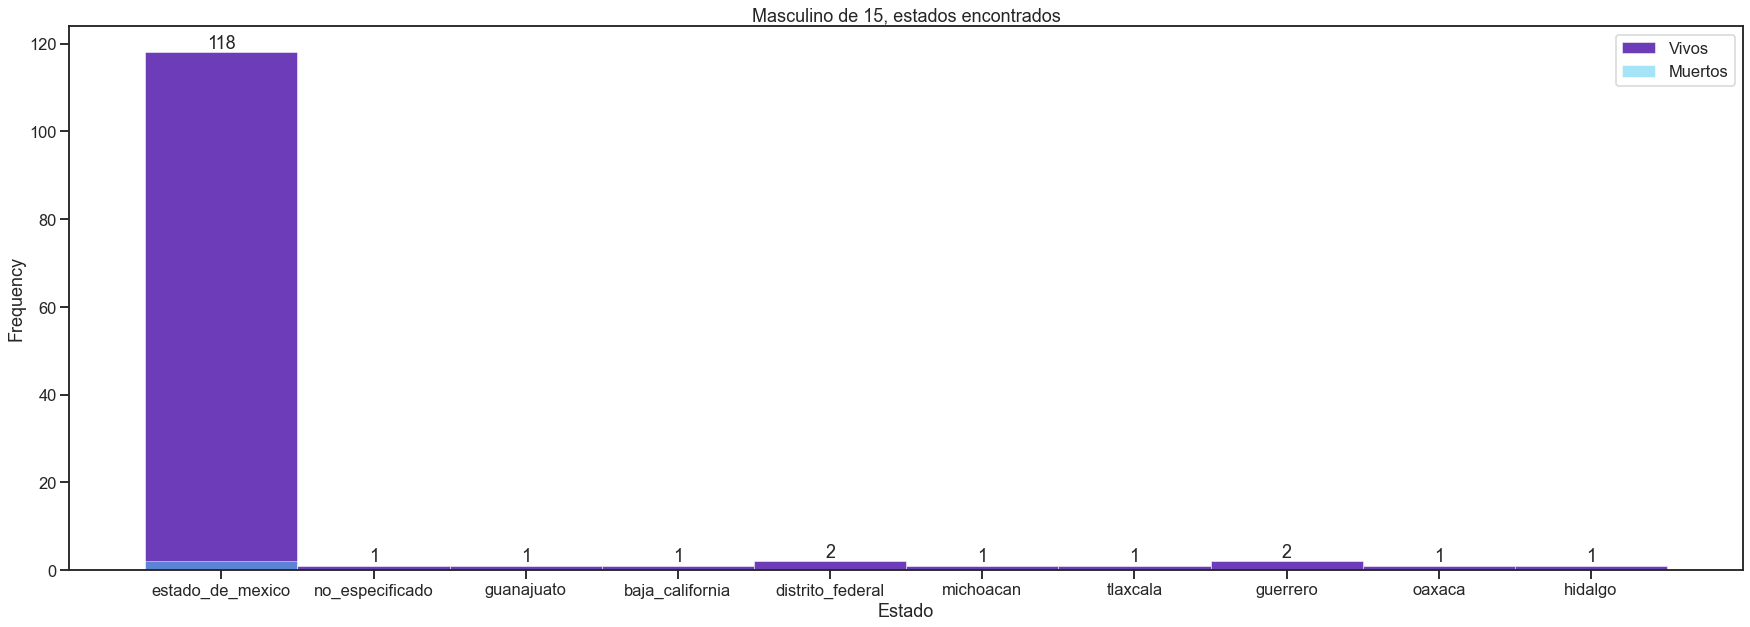

In [80]:
plt.figure(figsize=(30,10))

sns.set_style("ticks")
sns.set_context("talk")

sns.histplot(edo_Mex[(edo_Mex["edad"] == 15 ) & (edo_Mex["sexo"]== "masculino") & (edo_Mex["vivo_o_muerto"] == "vivo")].estado_localizado, label='Vivos', color="#480ca8", alpha=0.8,linewidth=.5)
ax = sns.histplot(edo_Mex[(edo_Mex["edad"] == 15 ) & (edo_Mex["sexo"]== "masculino") & (edo_Mex["vivo_o_muerto"] == "muerto")].estado_localizado, label='Muertos', color="#4cc9f0",alpha=0.5,linewidth=.5)#4361ee
ax.bar_label(ax.containers[0])

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Estado')
plt.title('Masculino de 15, estados encontrados')

plt.show()

In [83]:
edo_Mex[(edo_Mex["edad"]==15)].posible_causa_desaparicion.value_counts().head(10)

-1                                  316
no_especificado                     178
problemas_familiares                 74
ausencia_voluntaria_por_noviazgo     30
por_su_propia_voluntad               18
relaciones_personales                16
problemas_personales                 14
problemas_sociales                   10
problemas_de_conducta                 7
auscencia_volutaria_por_noviazgo      6
Name: posible_causa_desaparicion, dtype: int64

## Individuos de 14 años

In [84]:
edo_Mex[(edo_Mex["edad"]==14)].sexo.value_counts()

femenino     578
masculino    150
Name: sexo, dtype: int64

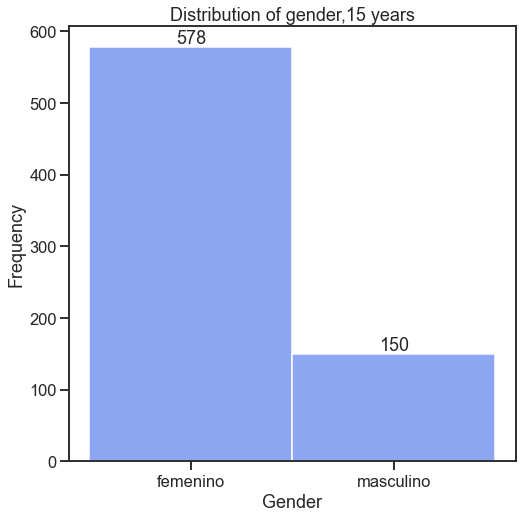

In [85]:
plt.figure(figsize=(8, 8))

sns.set_palette("coolwarm")
sns.set_style("ticks")
sns.set_context("talk")

plt.ylabel('Frequency')
plt.xlabel('Gender')
plt.title('Distribution of gender,15 years')

ax = sns.histplot(edo_Mex[(edo_Mex["edad"]==14)].sexo)
ax.bar_label(ax.containers[0])

plt.show()

In [86]:
edo_Mex[(edo_Mex["edad"]==14) & (edo_Mex["sexo"]=="femenino")].vivo_o_muerto.value_counts()

vivo                 434
aun_sin_localizar    141
muerto                 3
Name: vivo_o_muerto, dtype: int64

In [87]:
edo_Mex[(edo_Mex["edad"]==14) & (edo_Mex["sexo"]=="masculino")].vivo_o_muerto.value_counts()

vivo                 118
aun_sin_localizar     31
muerto                 1
Name: vivo_o_muerto, dtype: int64

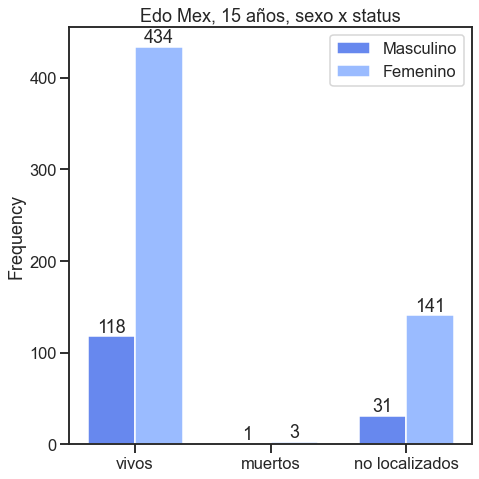

In [88]:
labels = ['vivos', 'muertos', 'no localizados']
men_means = [118,1,31]
women_means = [434, 3, 141]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(7,7))
rects1 = ax.bar(x - width/2, men_means, width, label='Masculino')
rects2 = ax.bar(x + width/2, women_means, width, label='Femenino')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency')
ax.set_title('Edo Mex, 15 años, sexo x status')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0), #(offset x, offset y)
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [89]:
edo_Mex[(edo_Mex["edad"]==14) & (edo_Mex["sexo"]=="masculino") & (edo_Mex["vivo_o_muerto"]=="vivo")].estado_localizado.value_counts()

estado_de_mexico    107
no_especificado       2
distrito_federal      2
hidalgo               1
veracruz              1
jalisco               1
morelos               1
Name: estado_localizado, dtype: int64

In [90]:
edo_Mex[(edo_Mex["edad"]==14) & (edo_Mex["sexo"]=="femenino") & (edo_Mex["vivo_o_muerto"]=="vivo")].estado_localizado.value_counts()

estado_de_mexico    390
distrito_federal      7
no_especificado       5
guerrero              3
queretaro             2
veracruz              2
morelos               2
puebla                2
hidalgo               1
oaxaca                1
jalisco               1
Name: estado_localizado, dtype: int64

In [91]:
edo_Mex[(edo_Mex["edad"]==14) & (edo_Mex["sexo"]=="masculino") & (edo_Mex["vivo_o_muerto"]=="muerto")].estado_localizado.value_counts()

estado_de_mexico    1
Name: estado_localizado, dtype: int64

In [92]:
edo_Mex[(edo_Mex["edad"]==14) & (edo_Mex["sexo"]=="femenino") & (edo_Mex["vivo_o_muerto"]=="muerto")].estado_localizado.value_counts()

estado_de_mexico    3
Name: estado_localizado, dtype: int64

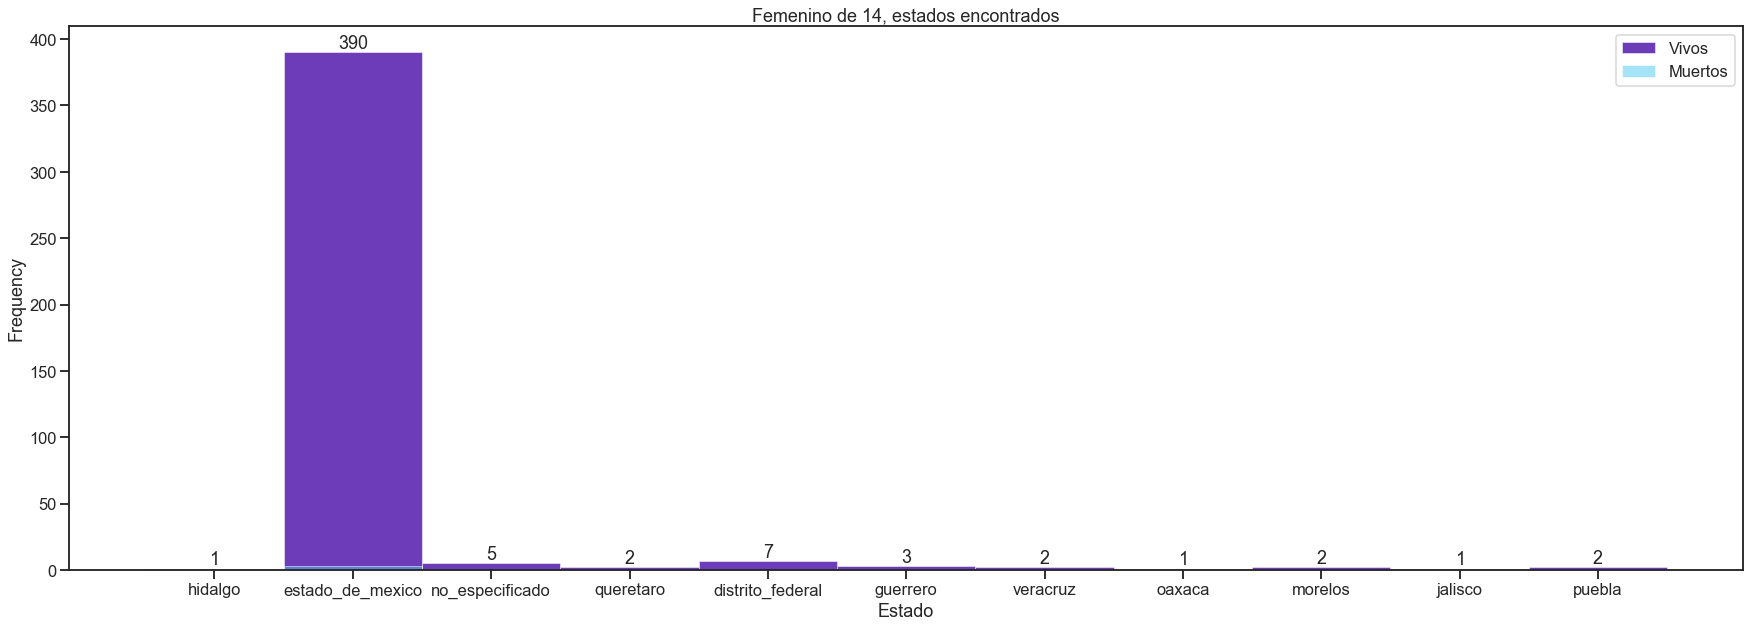

In [93]:
plt.figure(figsize=(30,10))

sns.set_style("ticks")
sns.set_context("talk")

sns.histplot(edo_Mex[(edo_Mex["edad"] == 14 ) & (edo_Mex["sexo"]== "femenino") & (edo_Mex["vivo_o_muerto"] == "vivo")].estado_localizado, label='Vivos', color="#480ca8", alpha=0.8,linewidth=.5)
ax = sns.histplot(edo_Mex[(edo_Mex["edad"] == 14 ) & (edo_Mex["sexo"]== "femenino") & (edo_Mex["vivo_o_muerto"] == "muerto")].estado_localizado, label='Muertos', color="#4cc9f0",alpha=0.5,linewidth=.5)#4361ee
ax.bar_label(ax.containers[0])

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Estado')
plt.title('Femenino de 14, estados encontrados')

plt.show()

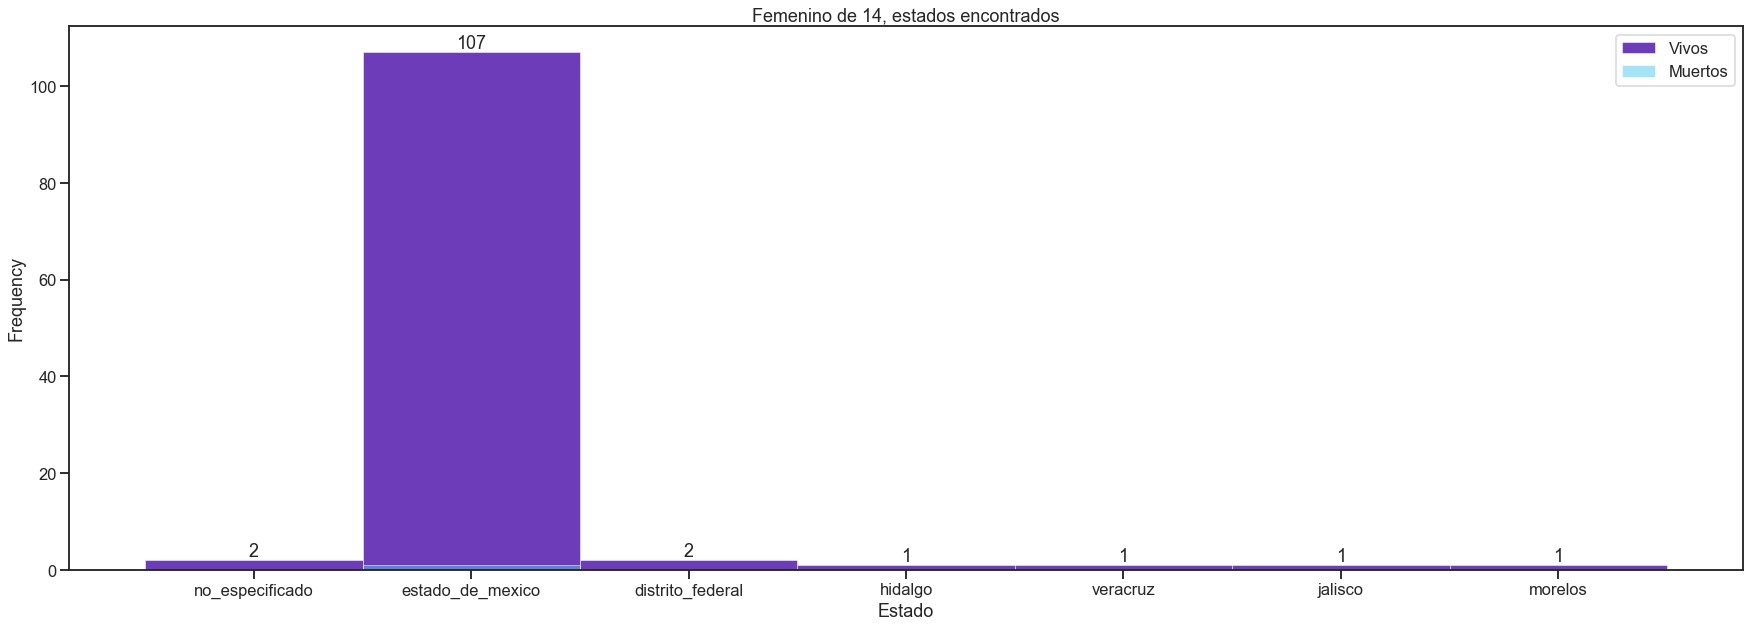

In [94]:
plt.figure(figsize=(30,10))

sns.set_style("ticks")
sns.set_context("talk")

sns.histplot(edo_Mex[(edo_Mex["edad"] == 14 ) & (edo_Mex["sexo"]== "masculino") & (edo_Mex["vivo_o_muerto"] == "vivo")].estado_localizado, label='Vivos', color="#480ca8", alpha=0.8,linewidth=.5)
ax = sns.histplot(edo_Mex[(edo_Mex["edad"] == 14 ) & (edo_Mex["sexo"]== "masculino") & (edo_Mex["vivo_o_muerto"] == "muerto")].estado_localizado, label='Muertos', color="#4cc9f0",alpha=0.5,linewidth=.5)#4361ee
ax.bar_label(ax.containers[0])

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Estado')
plt.title('Femenino de 14, estados encontrados')

plt.show()

In [95]:
edo_Mex[(edo_Mex["edad"]==14)].posible_causa_desaparicion.value_counts().head(10)

-1                                  248
no_especificado                     127
problemas_familiares                 40
ausencia_voluntaria_por_noviazgo     22
por_su_propia_voluntad               17
problemas_personales                 13
relaciones_personales                12
problemas_sociales                    7
ausencia_por_noviazgo                 5
amigos                                4
Name: posible_causa_desaparicion, dtype: int64